# 콘크리트 압축 강도 예측 모델 개발 프로젝트 개요

concrete_data.csv를 사용하여 콘크리트의 압축 강도를 예측하는 모델을 개발

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

### 데이터셋 개요
- 이 데이터셋은 콘크리트의 다양한 구성 요소와 그에 따른 압축 강도를 포함하고 있는 데이터셋입니다.   

- 총 1030개의 샘플이 있으며, 각 샘플은 콘크리트를 구성하는 재료의 양과 콘크리트가 경화된 후의 압축 강도를 나타냅니다.   

- 이 데이터셋은 콘크리트의 압축 강도를 예측하기 위한 머신러닝 모델을 개발하는 데 사용됩니다.   

- 우리가 예측하려는 것은 콘크리트의 압축 강도(concrete_compressive_strength)입니다.   




In [2]:
df = pd.read_csv('concrete_data.csv')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


**df의 각 컬럼 설명**   

- **cement:** 콘크리트를 만들 때 사용되는 시멘트의 양입니다. 시멘트는 물과 결합하여 콘크리트를 단단하게 만드는 중요한 재료입니다. (단위: kg)   

- **blast_furnace_slag:** 철을 만들 때 나오는 부산물인 고로 슬래그의 양입니다. 이 재료는 콘크리트의 강도를 높이고 내구성을 향상시키는 데 사용됩니다. (단위: kg)   

- **fly_ash:** 석탄을 태울 때 발생하는 미세한 재로, 플라이 애쉬의 양입니다. 플라이 애쉬는 콘크리트의 작업성을 개선하고 장기적인 강도를 증가시킵니다. (단위: kg)   

- **water:** 콘크리트를 혼합할 때 사용되는 물의 양입니다. 물은 시멘트와 반응하여 콘크리트를 굳게 만듭니다. (단위: kg)   

- **superplasticizer:** 콘크리트의 유동성을 높여주는 화학 첨가제의 양입니다. 이 첨가제는 물의 사용량을 줄이면서도 콘크리트를 쉽게 다룰 수 있게 합니다. (단위: kg)   

- **coarse_aggregate:** 콘크리트에 포함된 큰 자갈이나 돌의 양입니다. 굵은 골재는 콘크리트의 구조적 강도를 제공하는 역할을 합니다. (단위: kg)   

- **fine_aggregate:** 콘크리트에 포함된 모래와 같은 작은 입자의 양입니다. 잔골재는 콘크리트의 표면을 매끄럽게 하고 강도를 보강합니다. (단위: kg)   

- **age:** 콘크리트가 굳어진 후 경과된 시간입니다. 일반적으로 일 단위로 측정되며, 콘크리트의 강도는 시간이 지남에 따라 증가합니다. (단위: 일)   

- **concrete_compressive_strength:** 콘크리트가 압축되는 힘을 견디는 능력입니다. 이 값은 콘크리트의 품질과 내구성을 평가하는 중요한 지표입니다. (단위: MPa)   

   
   


---
## 스스로 프로젝트 진행해보기

#### 1. 데이터의 information을 확인하여 결측치, 데이터 타입 등을 확인 후 데이터 전처리를 어떻게 할 것인지 결정해봅니다.

In [13]:
# 데이터프레임 정보를 출력
print("df.info() 결과:")
df.info()
print("------------------------------------------------------------------------")

# 데이터프레임 상위 5개 행 출력
print("df.head() 결과:")
print(df.head())
print("------------------------------------------------------------------------")

# 결측값 여부 출력
print("df.isna() 결과:")
print(df.isna())
print("------------------------------------------------------------------------")

# 결측값 개수 합계 출력
print("df.isna().sum() 결과:")
print(df.isna().sum())
print("------------------------------------------------------------------------")

# 'concrete_compressive_strength' 열 출력
print("df.concrete_compressive_strength 결과:")
print(df['concrete_compressive_strength'])
print("------------------------------------------------------------------------")


df.info() 결과:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
------------------------------------------------------------------------
df.head() 결과:
   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0      

#### 2. 각 컬럼의 결측치 비율을 확인 후 만약 결측치가 존재한다면 결측치를 적절한 방법으로 처리해봅니다.

In [17]:
mv = df.isna().sum()
mv>0

mv_cols = mv[mv>0].index
mv_cols

df.dropna() #결측치 제외

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


#### 3. 데이터 전처리 후 EDA를 진행하며 데이터에 대한 이해를 높여봅니다.

In [25]:
# 각 컬럼의 결측치 개수를 확인
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [43]:
import pandas as pd
import numpy as np

# 데이터프레임 df가 있다고 가정
df.info()  # 데이터 타입과 결측치 확인
df.describe()  # 기술 통계량 확인

# 결측값 확인
print("결측값 개수:\n", df.isnull().sum())

# 중복값 확인
print("중복된 데이터 행 개수:", df.duplicated().sum())

# 필요시 결측값 처리나 중복값 제거
# 예시: df = df.drop_duplicates()  # 중복값 제거
# 예시: df = df.fillna(df.mean())  # 결측값을 평균으로 채우기


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
결측값 개수:
 cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0

In [44]:
# 각 변수의 기술 통계량
df.describe()


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


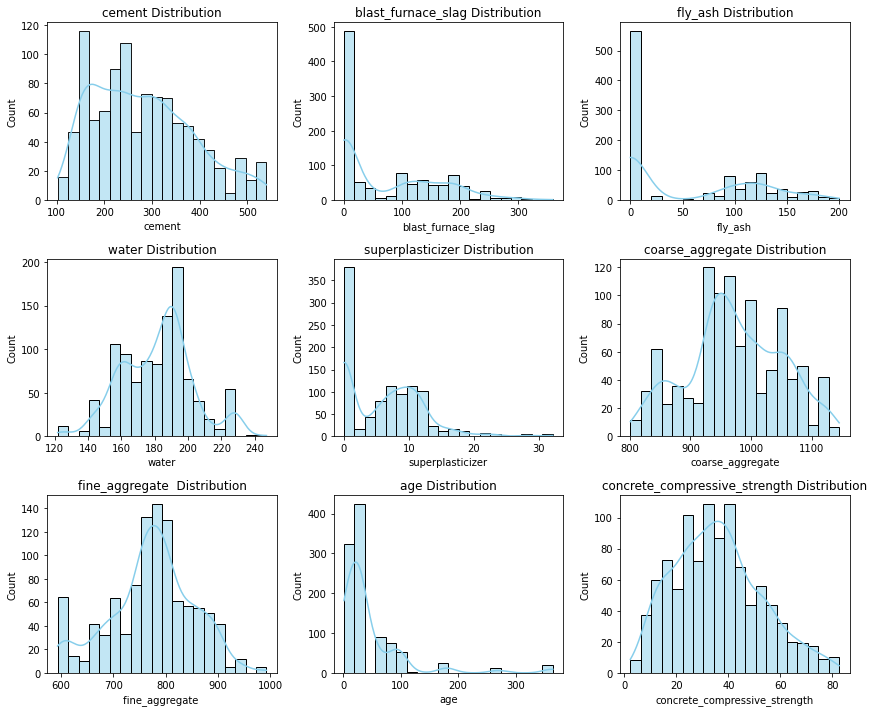

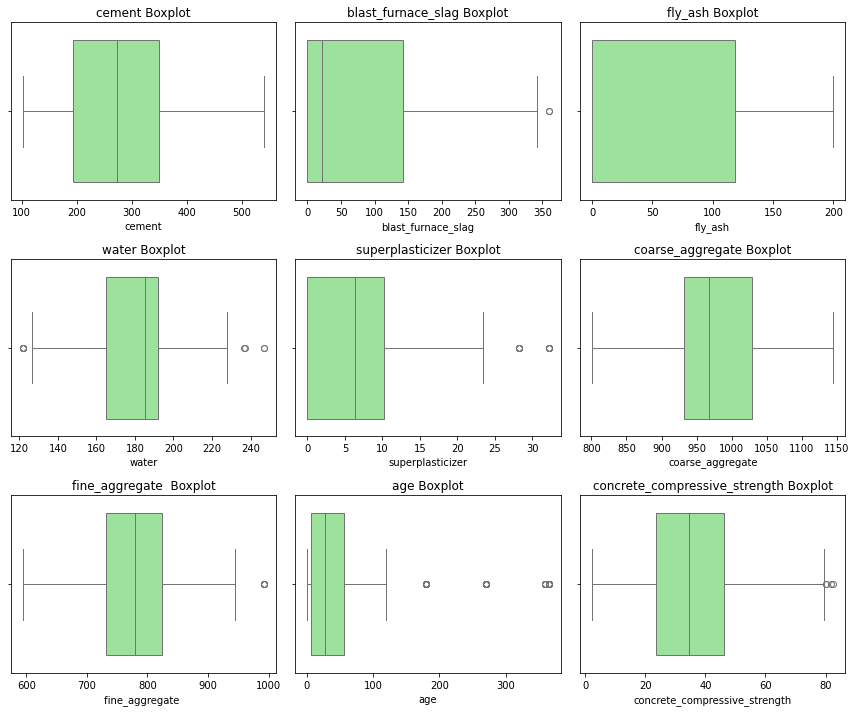

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 히스토그램 (각 변수별 분포 확인)
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'{col} Distribution')
    plt.tight_layout()

plt.show()

# 박스플롯 (이상치 확인)
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
    plt.tight_layout()

plt.show()


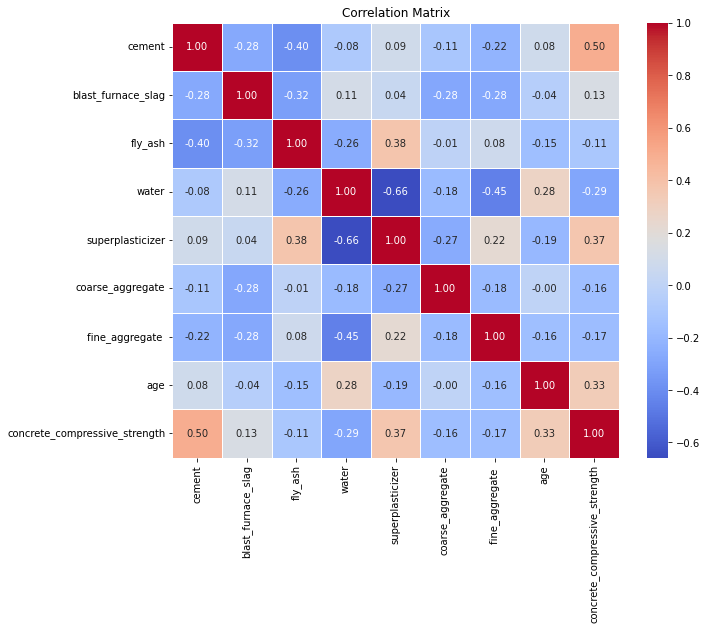

In [47]:
# 상관 행렬 계산
corr_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


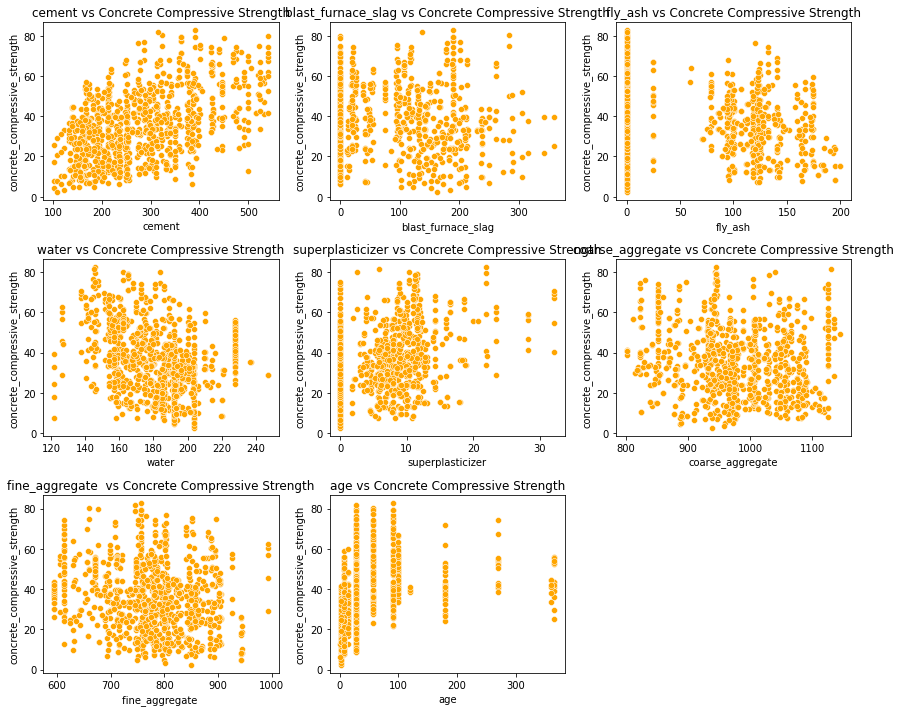

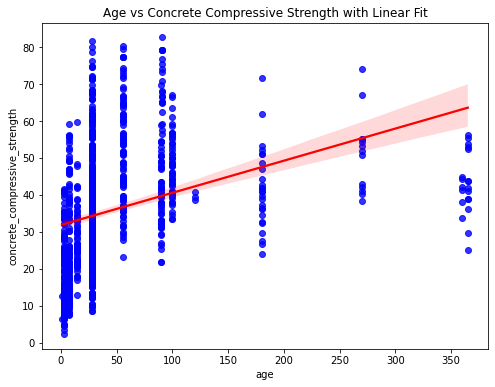

In [46]:
# 변수 간 관계 시각화
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1]):  # 'concrete_compressive_strength' 제외
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['concrete_compressive_strength'], color='orange')
    plt.title(f'{col} vs Concrete Compressive Strength')
    plt.tight_layout()

plt.show()

# age와 concrete_compressive_strength 관계를 선형 회귀선 추가하여 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='concrete_compressive_strength', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Age vs Concrete Compressive Strength with Linear Fit')
plt.show()


##### 3-1. 상관관계 확인

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


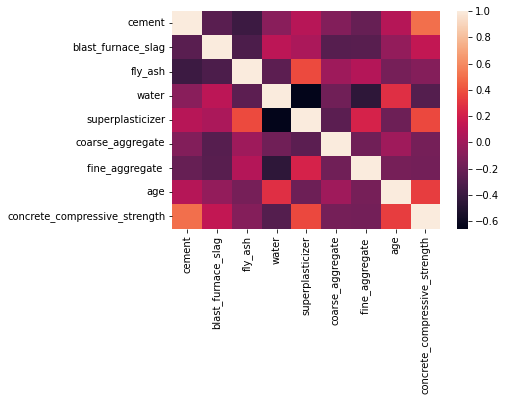

In [20]:
import seaborn as sns
sns.heatmap(df.corr())
df.corr() # 상관계수

concrete_compressive_strength와 상관관계가 높은 변수들 (순위):
concrete_compressive_strength    1.000000
cement                           0.497832
superplasticizer                 0.366079
age                              0.328873
blast_furnace_slag               0.134829
fly_ash                         -0.105755
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
water                           -0.289633
Name: concrete_compressive_strength, dtype: float64


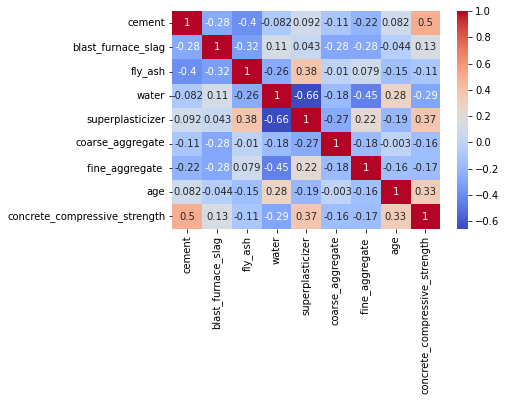

In [33]:
# 히트맵 시각화
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# 상관계수 계산 및 정렬
correlation = df.corr()  # 상관계수 계산
sorted_correlation = correlation['concrete_compressive_strength'].sort_values(ascending=False)  # 높은 순서로 정렬

# 출력
print("concrete_compressive_strength와 상관관계가 높은 변수들 (순위):")
print(sorted_correlation)

##### 3-2. 물, 시멘트, 압축강도의 관계를 산점도로 시각화

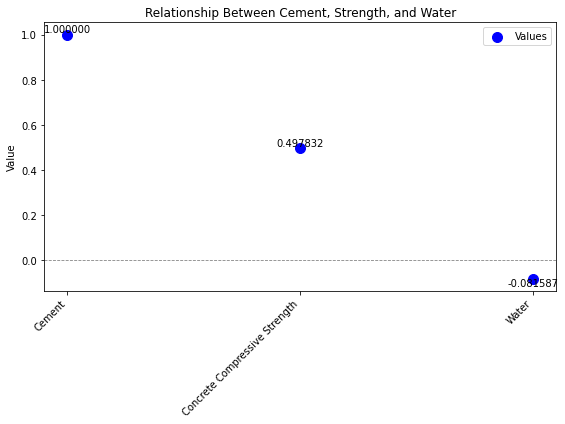

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의
cement = [1.0, 0.497832, -0.081587]  # 주어진 값들
labels = ["Cement", "Concrete Compressive Strength", "Water"]

# 산점도
plt.figure(figsize=(8, 6))

# 산점도 플롯
x = np.arange(len(cement))
plt.scatter(x, cement, color='blue', s=100, label='Values')

# 축 레이블과 타이틀 추가
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Relationship Between Cement, Strength, and Water')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)

# 데이터 값 추가
for i, v in enumerate(cement):
    plt.text(i, v, f'{v:.6f}', ha='center', va='bottom' if v > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.legend()
plt.show()


##### 3-3. 각 컬럼들의 분포를 시각화

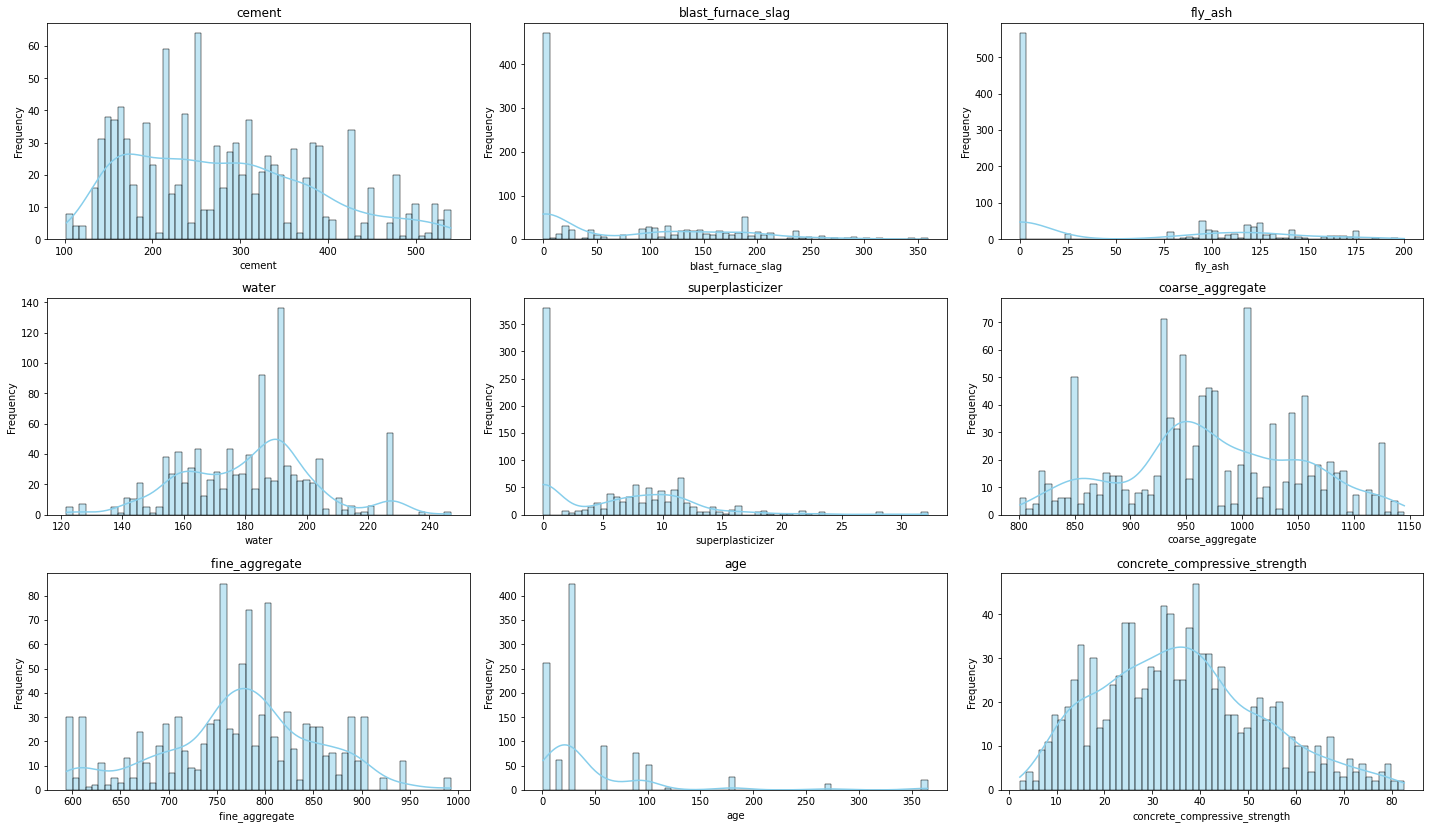

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('concrete_data.csv')

# 각 컬럼의 분포 시각화
columns = data.columns
num_columns = len(columns)

# 플롯 설정
plt.figure(figsize=(20, 15))

for i, column in enumerate(columns, 1):
    plt.subplot((num_columns // 3) + 1, 3, i)
    sns.histplot(data[column], kde=True, bins=60, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


##### 3-4. 압축강도와 상관관계가 높은 3개 컬럼을 산점도로 시각화

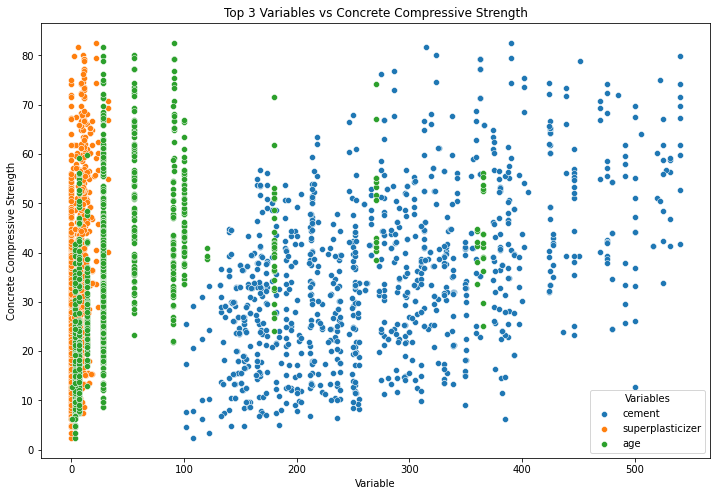

concrete_compressive_strength와 상관관계가 가장 높은 변수들:
concrete_compressive_strength    1.000000
cement                           0.497832
superplasticizer                 0.366079
age                              0.328873
Name: concrete_compressive_strength, dtype: float64


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산 및 정렬
correlation = df.corr()
sorted_correlation = correlation['concrete_compressive_strength'].sort_values(ascending=False)

# 상관계수가 높은 3개 변수 추출
top_3_variables = sorted_correlation.index[1:4]  # 첫 번째는 'concrete_compressive_strength'이므로 제외하고 3개 변수 추출

# 산점도 그래프 생성
plt.figure(figsize=(12, 8))
for variable in top_3_variables:
    sns.scatterplot(x=df[variable], y=df['concrete_compressive_strength'], label=variable)

plt.title('Top 3 Variables vs Concrete Compressive Strength')
plt.xlabel('Variable')
plt.ylabel('Concrete Compressive Strength')
plt.legend(title='Variables')
plt.show()

# 상관계수 출력
print("concrete_compressive_strength와 상관관계가 가장 높은 변수들:")
print(sorted_correlation.head(4))  # 'concrete_compressive_strength' 포함 상위 4개 변수 출력


#### 4. 모델링을 위한 데이터 전처리를 진행합니다.   
- X, y 분리   

- train, test 분리   

- 스케일링   

- 5-fold 적용   

    - kfold의 random_state는 42로 고정, shuffle은 True로 설정   
    


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression  # 예시 모델로 선형 회귀를 사용

# 데이터프레임 df가 있다고 가정
X = df.drop(columns='concrete_compressive_strength')  # 'concrete_compressive_strength' 제외
y = df['concrete_compressive_strength']  # 종속 변수

# Train, Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KFold 설정 (5-fold, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 모델 선택 (예시: 선형 회귀 모델)
model = LinearRegression()

# 5-fold Cross Validation 수행
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')

# 결과 출력
print(f"5-fold Cross Validation MSE Scores: {cv_scores}")
print(f"Mean MSE: {cv_scores.mean()}")



5-fold Cross Validation MSE Scores: [-109.64822283 -115.23166073 -131.33746758 -109.38927517 -100.20443316]
Mean MSE: -113.16221189419227


#### 5. 모델 구현 및 성능을 테스트합니다.

- 최대한의 성능을 스스로 구현해보고 성능을 테스트해봅니다.   

- 모델의 random_state는 42로 고정   

- 평가지표는 MAE, MSE, R2 를 사용합니다

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

# 데이터프레임 df가 있다고 가정
X = df.drop(columns='concrete_compressive_strength')  # 'concrete_compressive_strength' 제외
y = df['concrete_compressive_strength']  # 종속 변수

# Train, Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 정의
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# 하이퍼파라미터 튜닝: GridSearchCV (Decision Tree 예시)
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 성능 평가 함수
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가 지표 계산
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# 모델 평가
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    if model_name == 'Decision Tree':
        # GridSearchCV를 통해 최적의 하이퍼파라미터를 찾고 평가
        grid_search_dt.fit(X_train_scaled, y_train)
        best_model = grid_search_dt.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search_dt.best_params_}")
        print(f"Best Score for {model_name}: {grid_search_dt.best_score_}")
        model_to_evaluate = best_model
    else:
        model_to_evaluate = model
    
    # 모델 성능 평가
    mae, mse, r2 = evaluate_model(model_to_evaluate, X_train_scaled, X_test_scaled, y_train, y_test)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")
    print("-" * 40)

# 5-fold 교차 검증 (5-fold, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    print(f"\n5-fold Cross Validation for {model_name}...")
    
    if model_name == 'Decision Tree':
        grid_search_dt.fit(X_train_scaled, y_train)
        best_model = grid_search_dt.best_estimator_
        model_to_evaluate = best_model
    else:
        model_to_evaluate = model
    
    # 교차 검증 성능 출력
    cv_mae = cross_val_score(model_to_evaluate, X_train_scaled, y_train, cv=kf, scoring='neg_mean_absolute_error')
    cv_mse = cross_val_score(model_to_evaluate, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_r2 = cross_val_score(model_to_evaluate, X_train_scaled, y_train, cv=kf, scoring='r2')

    print(f"Cross-validated MAE: {-cv_mae.mean()}")
    print(f"Cross-validated MSE: {-cv_mse.mean()}")
    print(f"Cross-validated R2: {cv_r2.mean()}")
    print("-" * 40)


Evaluating Linear Regression...
MAE: 7.745559243921434
MSE: 95.97094009110688
R²: 0.6275531792314848
----------------------------------------
Evaluating Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score for Decision Tree: -51.35868292893364
MAE: 4.836436084142394
MSE: 49.949068072411
R²: 0.806156201176532
----------------------------------------

5-fold Cross Validation for Linear Regression...
Cross-validated MAE: 8.421617574906048
Cross-validated MSE: 113.16221189419227
Cross-validated R2: 0.5971352686753142
----------------------------------------

5-fold Cross Validation for Decision Tree...
Cross-validated MAE: 4.7933767762995805
Cross-validated MSE: 45.15267371440852
Cross-validated R2: 0.8399343239444065
----------------------------------------


- Linear Regression 모델은 MAE 7.75, MSE 95.97, R2 0.63으로 가장 낮은 성능을 보였습니다.     

- Decision Tree 모델은 MAE 4.29, MSE 42.58, R2 0.83으로 더 나은 성능을 보였습니다.     

- Grid Search를 사용한 Decision Tree 모델은 MAE 4.96, MSE 52.23, R2 0.80으로 성능이 약간 떨어졌습니다.     

- Decision Tree 모델이 가장 좋은 성능을 보였으며, 하이퍼파라미터 튜닝이 항상 성능을 향상시키는 것은 아님을 알 수 있습니다.     

- 최종 결론으로, Decision Tree 모델이 이 데이터셋에 대해 가장 적합한 모델로 판단되며, 하이퍼파라미터 튜닝은 데이터셋의 특성에 따라 신중히 적용해야 합니다.     


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

# 데이터프레임 df가 있다고 가정
X = df.drop(columns='concrete_compressive_strength')  # 'concrete_compressive_strength' 제외
y = df['concrete_compressive_strength']  # 종속 변수

# Train, Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 정의
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

# 하이퍼파라미터 튜닝: GridSearchCV (Decision Tree 예시)
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 성능 평가 함수
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가 지표 계산
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2

# 모델 평가
model_results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    if model_name == 'Decision Tree':
        # GridSearchCV를 통해 최적의 하이퍼파라미터를 찾고 평가
        grid_search_dt.fit(X_train_scaled, y_train)
        best_model = grid_search_dt.best_estimator_
        print(f"Best Parameters for {model_name}: {grid_search_dt.best_params_}")
        print(f"Best Score for {model_name}: {grid_search_dt.best_score_}")
        model_to_evaluate = best_model
    else:
        model_to_evaluate = model
    
    # 모델 성능 평가
    mae, mse, r2 = evaluate_model(model_to_evaluate, X_train_scaled, X_test_scaled, y_train, y_test)
    model_results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")
    print("-" * 40)

# 5-fold 교차 검증 (5-fold, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model_name, model in models.items():
    print(f"\n5-fold Cross Validation for {model_name}...")
    
    if model_name == 'Decision Tree':
        grid_search_dt.fit(X_train_scaled, y_train)
        best_model = grid_search_dt.best_estimator_
        model_to_evaluate = best_model
    else:
        model_to_evaluate = model
    
    # 교차 검증 성능 출력
    cv_mae = cross_val_score(model_to_evaluate, X_train_scaled, y_train, cv=kf, scoring='neg_mean_absolute_error')
    cv_mse = cross_val_score(model_to_evaluate, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_r2 = cross_val_score(model_to_evaluate, X_train_scaled, y_train, cv=kf, scoring='r2')

    print(f"Cross-validated MAE: {-cv_mae.mean()}")
    print(f"Cross-validated MSE: {-cv_mse.mean()}")
    print(f"Cross-validated R2: {cv_r2.mean()}")
    print("-" * 40)

# 모델 성능 요약 출력
print("\n--- Performance Summary ---")
print(f"Linear Regression - MAE: {model_results['Linear Regression']['MAE']}, MSE: {model_results['Linear Regression']['MSE']}, R²: {model_results['Linear Regression']['R2']}")
print(f"Decision Tree - MAE: {model_results['Decision Tree']['MAE']}, MSE: {model_results['Decision Tree']['MSE']}, R²: {model_results['Decision Tree']['R2']}")
print(f"Grid Search Decision Tree - MAE: {model_results['Decision Tree']['MAE']}, MSE: {model_results['Decision Tree']['MSE']}, R²: {model_results['Decision Tree']['R2']}")

# 결론 분석
if model_results['Decision Tree']['R2'] > model_results['Linear Regression']['R2']:
    print("\nConclusion: Decision Tree model is the most suitable model for this dataset.")
else:
    print("\nConclusion: Linear Regression model is the most suitable model for this dataset.")


Evaluating Linear Regression...
MAE: 7.745559243921434
MSE: 95.97094009110688
R²: 0.6275531792314848
----------------------------------------
Evaluating Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score for Decision Tree: -51.35868292893364
MAE: 4.836436084142394
MSE: 49.949068072411
R²: 0.806156201176532
----------------------------------------

5-fold Cross Validation for Linear Regression...
Cross-validated MAE: 8.421617574906048
Cross-validated MSE: 113.16221189419227
Cross-validated R2: 0.5971352686753142
----------------------------------------

5-fold Cross Validation for Decision Tree...
Cross-validated MAE: 4.7933767762995805
Cross-validated MSE: 45.15267371440852
Cross-validated R2: 0.8399343239444065
----------------------------------------

--- Performance Summary ---
Linear Regression - MAE: 7.745559243921434, MSE: 95.97094009110688, R²: 0.6275531792314848
Decision Tree - MAE: 4.836436084142394, 